# Question 3: Zico the Tutor
## By Musa Rasheed (25618232)

A senior student, Zico, starts to manage his own banking account. His initial deposit is $\$2,000$. Meanwhile, he starts to tutor $10$ high school students in Calculus. Every week, each student contacts Zico for tutoring with a probability of $p = 0.8$. If a student contacts Zico, Zico earns $\$50$ and deposits it into his banking account; otherwise, he needs to withdraw $\$20$ for his living expense. Suppose that each student contacts Zico independently every week.

## A) Find the probability distribution of the number of tutor sessions each student needs after 5 weeks. (4 marks) 

(Hint: Use $X_i$ to denote the number of tutor sessions the $i^{th}$ student needs for $5$ weeks, and give the $pmf$ of $X_i$)

### Answer

Interpreting the question such that each student needs only 1 tutoring session per week, then each student would have the same PMF table.

Now let's consider a student that needs only needs 1 lesson in all 5 weeks, which week will he need it? Week 1,2,3,4,5? It does not matter, he is equally likley to take any week with the same probability. So the chances of him taking any of those 5 weeks add up to be:

$$((0.8)^1 * (0.2)^4) * 5$$

This is known as a combination event, and is pretty easy when we have a simple example like this, but what if a student thinks they need 2 sessions in those 5 weeks? How many possible choices does he/she have?

| Week choice 1 | Week choice 2 |
|---------------|---------------|
|       1       |     2         |
|        1      | 3             |
|        1      |   4           |
|          1    |      5        |
|        2      |   3           |
|        2      |     4         |
|         2     |      5        |
|            3  |   4           |
|          3    |  5            |
|          4    |  5            |

That's 10 choices there, and it was a pain to do. If only there was a convinent formula to tell you how many combinations there were in which order does not matter, but what if I told you there was? It's called the combination formula, or nCr!

$$
nCr = \frac{n!}{r!*(n-r)!}\\
n = \text{total number of object in the set}\\
r = \text{number of choices from your set to make combos with}
$$

Remember that order doesn't matter here, because being tutored on week 2 and 5 is the same as being tutored on week 5 and 2. 

repeating this process for all weeks yeilds:

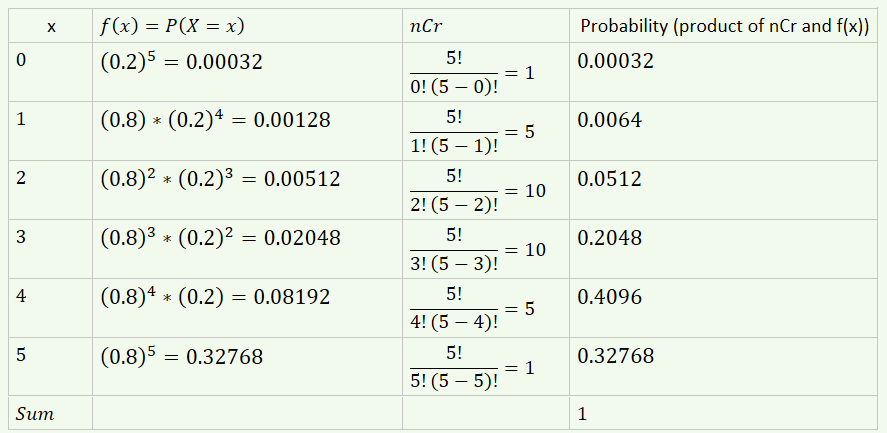

Simplifying this to have an easier PMF table: 

|  x  |   f(x)  |
|:---:|:-------:|
|  0  | 0.00032 |
|  1  |  0.0064 |
|  2  |  0.0512 |
|  3  |  0.2048 |
|  4  |  0.4096 |
|  5  | 0.32768 |
| Sum |    1    |

And as I am sure I will need to do some calculations later, let's convert this to an R dataframe:

In [1]:
x = c(0,1,2,3,4,5)
fx = c(0.00032,0.0064,0.0512,0.2048,0.4096,0.32768)
pmf = data.frame(x,fx)
pmf

x,fx
0,0.00032
1,0.00640
2,0.05120
3,0.20480
4,0.40960
5,0.32768


## B) Find the expected number of session each student needs after 5 weeks and the corresponding variance by definition. (3 marks)

Called it!

Expected value means we need the mean of this, which we get through this formula:

$$
\sum^{5}_{i=0} x * f(x)
$$

In [2]:
prod = pmf$x * pmf$fx #prod for product
cat("The expected value (which is also the mean) should be",sum(prod))

The expected value (which is also the mean) should be 4

To find the variance, we simply have to use the variance formula which is: 

$$Var(X)=E(X^2 )−[E(X)]^2$$
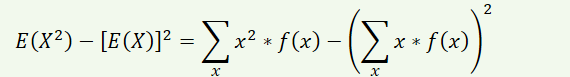


Let's do that now:

In [3]:
prod = (pmf$x^2) * (pmf$fx)
cat("The Variance is:",sum(prod))

#And I know it doesn't ask for it in the problem but:
cat("\nThe Standard Deviation is:",((sum(prod))^0.5))

The Variance is: 16.8
The Standard Deviation is: 4.09878

## C) Find the expected amount of deposit in Zico’s banking account after 5 weeks and the corresponding variance by definition. (3 marks)

As a reminder: 

**His initial deposit is $\$$2000**

**If a student contacts Zico, Zico earns  $\$$50 and deposits it into his banking account; otherwise, he needs to withdraw  $\$$20  for his living expense.**

The assumption is, his 10 students are expected to contact him 4 out of the 5 weeks. During the weeks where he has students contact him, he makes $\$$50 per student, and uses  $\$$20 of those dollars to cover living expenses netting him $\$$30. 

During the week when a student does not contact him, he uses up $\$$20 from his savings per student. Doing the math, it would seem that: 


$$2000 + 4 \text{ weeks } * (10 \text{ students} * (\$30)) - 1 \text{ week } * (10 \text{ students } * ( \$20)))$$

Calculating that using R:

In [4]:
bank = 2000 + 4*10*30 - 1*10*20
cat("Zico has $",bank,"in the bank after 5 weeks")

Zico has $ 3000 in the bank after 5 weeks

As for the variance, we have to simply use the variance formula once more: 

$$Var(X) = E(X^2) - [E(X)]^2$$

The only thing that varies is the number of weeks 

In [74]:
#First, I multiplied the weeks that he is paid, and subtracted the weeks he isn't paid. 
#I squared the weeks becuase of the variance formula
x_sq = (pmf$x * (30*10) - 20*10)^2

#Next I multiplied it by f(x)

product = x_sq * fx

#Finally, I took the sum, and subtracted it by the expected value squared
vari = sum(product) - (4*10*30 - 1*10*20)^2 #The variance
print(vari) #printing my answer to the question

[1] 72000
